In [10]:
from food.tools import *
from food.paths import *
from food.psql import *

import pandas as pd
import numpy as np
from pathlib import Path

# !nbdev_build_lib

In [11]:
photos_path = testset_path/'test_photos'

In [14]:
testdf = pd.read_csv(testset_path/'test_set.csv')

testdf.columns = ['name_f','','','','energy_f','','','','','weight_f','composition_f','url']
testdf = testdf.drop(columns = [c for c in testdf.columns if c == ''])

for c in ['energy_f','weight_f']:
    testdf[c] = testdf[c].str.replace(',','.').astype('float64')
    

testdf['url'] = testdf['url'].apply(lambda id:f"https://glovo.away.guru/test_photos/{id}.jpeg")

In [15]:
from food.search import *

In [18]:
from IPython.display import clear_output

In [20]:
r = []
n=0
fact = testdf.reset_index(drop=True)
for image in fact['url'].tolist():
    clear_output()
    print(n)
    r.append(search_image(image,env='prod'))
    n+=1

71
tensor([0.2401], dtype=torch.float64)
tensor([0.2487], dtype=torch.float64)
tensor([0.2504], dtype=torch.float64)
tensor([0.2503], dtype=torch.float64)
tensor([0.2504], dtype=torch.float64)
tensor([0.2503], dtype=torch.float64)
tensor([0.2504], dtype=torch.float64)
tensor([0.2503], dtype=torch.float64)
tensor([0.2504], dtype=torch.float64)
tensor([0.2503], dtype=torch.float64)
tensor([0.2504], dtype=torch.float64)
tensor([0.2503], dtype=torch.float64)
tensor([0.2504], dtype=torch.float64)
tensor([0.2503], dtype=torch.float64)
tensor([0.2504], dtype=torch.float64)
tensor([0.2503], dtype=torch.float64)
tensor([0.2504], dtype=torch.float64)
tensor([0.2503], dtype=torch.float64)
tensor([0.2504], dtype=torch.float64)
tensor([0.2503], dtype=torch.float64)
tensor([0.2504], dtype=torch.float64)
tensor([0.2503], dtype=torch.float64)
tensor([0.2504], dtype=torch.float64)
tensor([0.2503], dtype=torch.float64)
tensor([0.2504], dtype=torch.float64)
tensor([0.2503], dtype=torch.float64)
tensor([0

KeyboardInterrupt: 

In [22]:
image

'https://glovo.away.guru/test_photos/3fbd4cbe-478a-4482-99e2-43588541e950.jpeg'

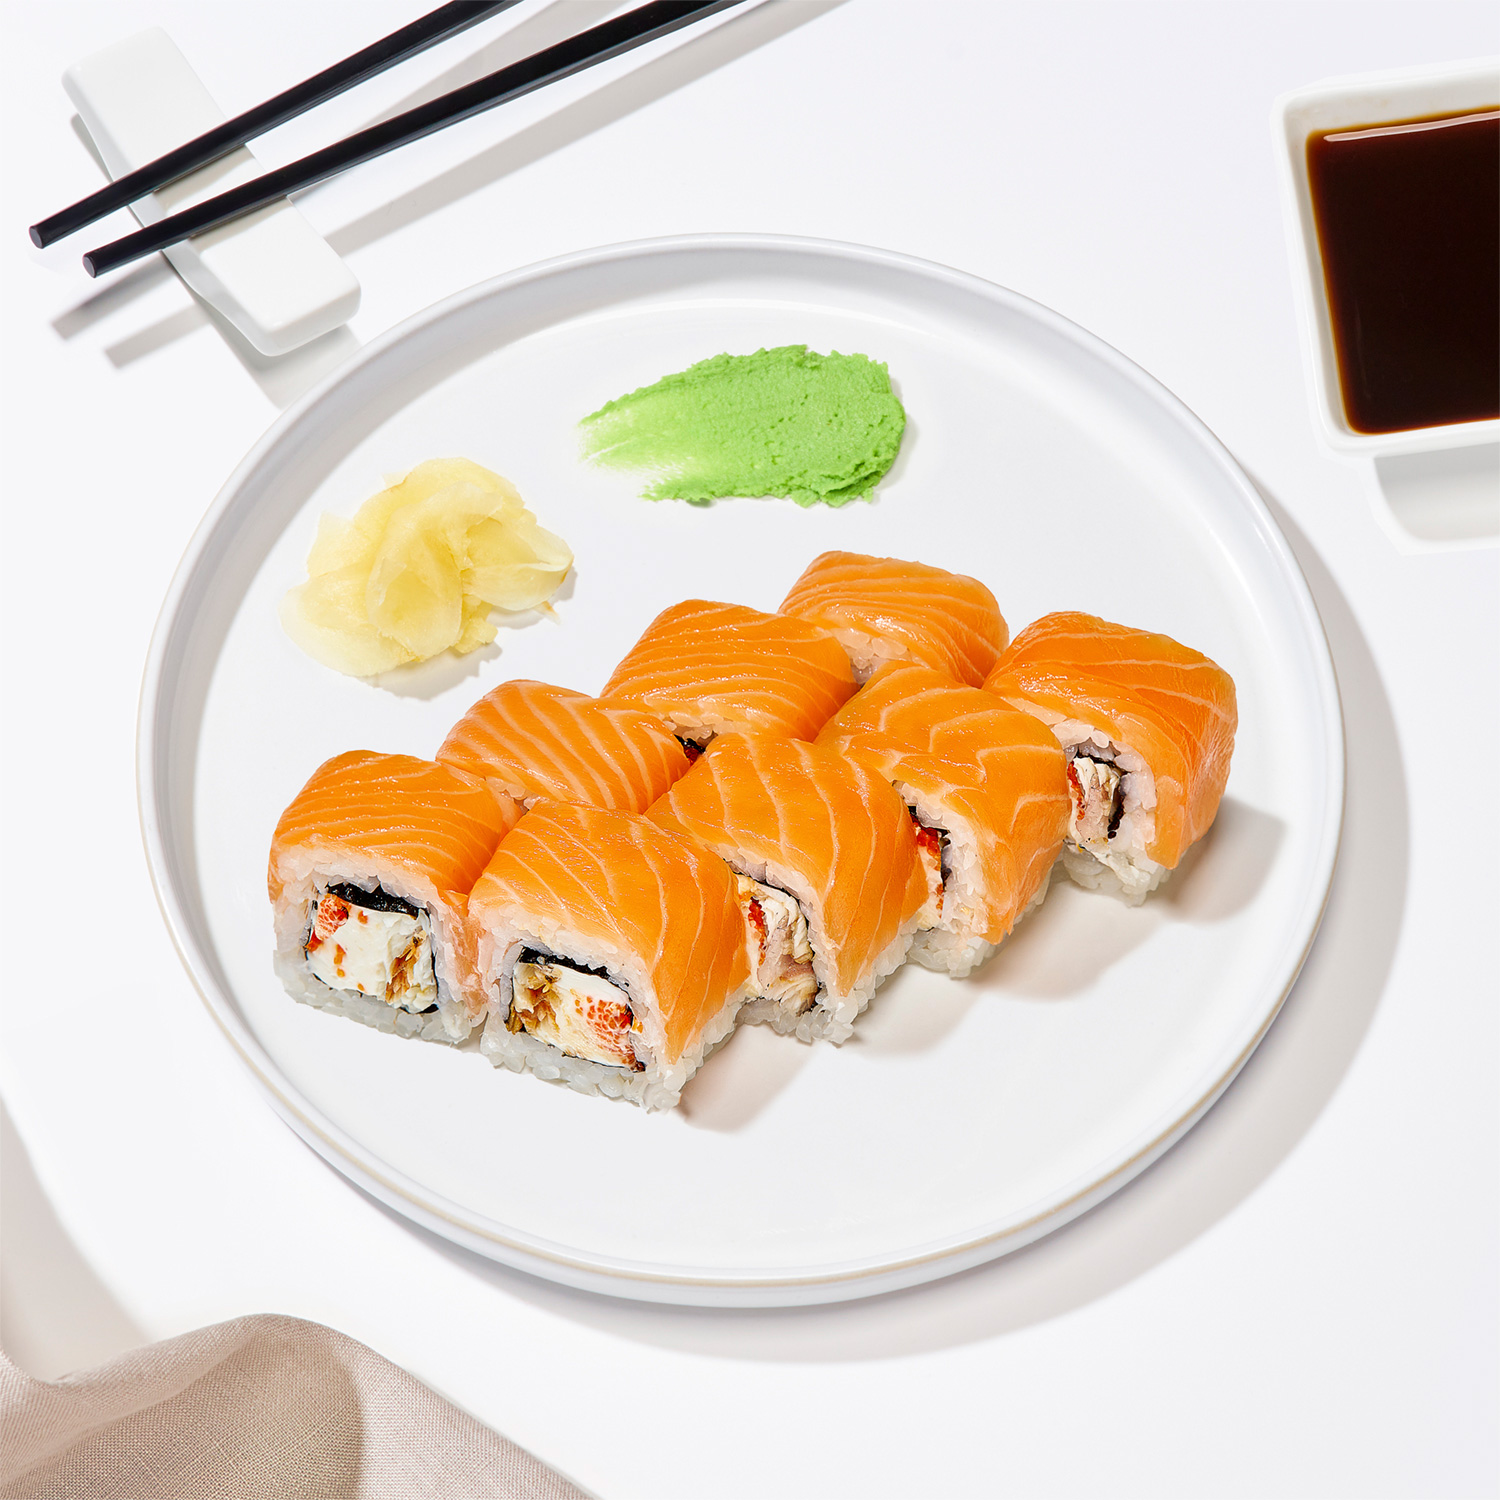

In [21]:
get_image_from_url(image)

In [ ]:
rr = fact.join(pd.concat(r).reset_index(drop=True))
rrr = rr[['energy_f','energy','url','description','composition_f']]
rrr['error'] = (rrr['energy_f']/rrr['energy']-1).abs()
rrr = rrr.sort_values('error',ascending = False).reset_index(drop=True)


/tmp/ipykernel_193942/790832201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rrr['error'] = (rrr['energy_f']/rrr['energy']-1).abs()


In [77]:
rrr.head(10)

energy_f  energy                                                url  \
0    177.65    53.0  https://glovo.away.guru/test_photos/b6dc5bae-4...   
1    146.72    53.0  https://glovo.away.guru/test_photos/a7d37b03-a...   
2    279.90   102.0  https://glovo.away.guru/test_photos/9e7c99aa-b...   
3    489.37   188.0  https://glovo.away.guru/test_photos/0ea2755e-a...   
4    203.69    80.0  https://glovo.away.guru/test_photos/d09ff520-0...   
5    178.71    71.0  https://glovo.away.guru/test_photos/b2f8f7ff-a...   
6    283.30   116.0  https://glovo.away.guru/test_photos/b02861b9-8...   
7    322.52   139.0  https://glovo.away.guru/test_photos/a46360f2-d...   
8     41.60    18.0  https://glovo.away.guru/test_photos/b582d43d-4...   
9    164.89    74.0  https://glovo.away.guru/test_photos/57d466f1-d...   

                                         description  \
0  Basil, raw. Sushi roll, avocado. Sushi roll, C...   
1  Basil, raw. Sushi roll, avocado. Sushi roll, C...   
2  Sushi roll, California. Sushi roll, eel. Peppe...   
3  Chicken breast, baked or broiled, skin eaten, ...   
4  Sushi roll tuna. Sushi roll, California. Tomat...   
5  Sushi roll, California. Sushi, topped with sal...   
6  Salmon, baked or broiled, made with margarine....   
7  Sushi roll, California. Sushi, topped with sal...   
8              Soft drink, cola, decaffeinated, diet   
9  Sushi roll tuna. Tomato chili sauce. Basil, ra...   

                                       composition_f     error  
0  Состав: рис, заправка для риса, огурец, водоро...  2.351887  
1  Состав: Рис, огурец, водоросли нори, имбирь ма...  1.768302  
2  Состав: Рис, соус для запекания (майонез, сыр ...  1.744118  
3  Состав: Курица, соевый соус синг сонг, масло р...  1.603032  
4  Состав: рис, креветки, мука темпурная, масло ф...  1.546125  
5  Состав: рис, креветки, икра тобико оранжевая, ...  1.517042  
6  Состав:Рис,вода,сахар,соль,уксус мицукан(спирт...  1.442241  
7  Состав: Рис, заправка для риса, мука темпурная...  1.320288  
8                                                NaN  1.311111  
9  Состав: Рис, заправка для риса, филе лосося, с...  1.228243

In [89]:
n =3

In [90]:
rrr.iloc[n]['description'],rrr.iloc[n]['composition_f']

('Chicken breast, baked or broiled, skin eaten, from pre-cooked. Chicken drumstick, baked, broiled, or roasted, skin eaten, from raw. Chicken, NS as to part, baked, broiled, or roasted, NS as to skin eaten. Chicken leg, drumstick and thigh, grilled without sauce, skin eaten. Chicken drumstick, grilled without sauce, skin eaten. Chicken thigh, rotisserie, skin eaten',
 'Состав: Курица, соевый соус синг сонг, масло растительное, чеснок сушёный, соль, перец чёрный молотый, перец острый чили, сахар-песок.\nПищевая ценность (средние значения) в 100 г белки- 18г./ жиры-46г./углеводы-1г. \nЭнергетическая ценность: 489 ккал/2047 кДж.\nУсловия хранения: при температуре от +2 до +6 °С.\nМасса нетто:450г.\nСТО 41745829-002-2021')

In [91]:
url = rrr.iloc[n]['url']

In [92]:
r, desc, sel,score = multiple_foods(url,env='prod')

tensor([0.2728], dtype=torch.float64)
tensor([0.2761], dtype=torch.float64)
tensor([0.2761], dtype=torch.float64)
tensor([0.2760], dtype=torch.float64)
tensor([0.2761], dtype=torch.float64)
tensor([0.2761], dtype=torch.float64)


In [93]:
r

id  \
text                                                          
the food is chicken, whole pieces . it has a li...  1098446   
the food is chicken, whole pieces . it has a li...  1098491   
the food is chicken, whole pieces . it has a li...  1098421   
the food is chicken, whole pieces . it has a li...  1098479   
the food is chicken, whole pieces . it has a li...  1098499   
the food is chicken, whole pieces . it has a li...  1098524   
the food is turkey, duck, other poultry . it ha...  1098640   

                                                                                          description  \
text                                                                                                    
the food is chicken, whole pieces . it has a li...  Chicken breast, baked or broiled, skin eaten, ...   
the food is chicken, whole pieces . it has a li...  Chicken drumstick, baked, broiled, or roasted,...   
the food is chicken, whole pieces . it has a li...  Chicken, NS as to part, baked, broiled, or roa...   
the food is chicken, whole pieces . it has a li...  Chicken leg, drumstick and thigh, grilled with...   
the food is chicken, whole pieces . it has a li...  Chicken drumstick, grilled without sauce, skin...   
the food is chicken, whole pieces . it has a li...              Chicken thigh, rotisserie, skin eaten   
the food is turkey, duck, other poultry . it ha...          Cornish game hen, roasted, skin not eaten   

                                                                       category  \
text                                                                              
the food is chicken, whole pieces . it has a li...        Chicken, whole pieces   
the food is chicken, whole pieces . it has a li...        Chicken, whole pieces   
the food is chicken, whole pieces . it has a li...        Chicken, whole pieces   
the food is chicken, whole pieces . it has a li...        Chicken, whole pieces   
the food is chicken, whole pieces . it has a li...        Chicken, whole pieces   
the food is chicken, whole pieces . it has a li...        Chicken, whole pieces   
the food is turkey, duck, other poultry . it ha...  Turkey, duck, other poultry   

                                                    energy  protein  carb  \
text                                                                        
the food is chicken, whole pieces . it has a li...   175.0    26.37  0.09   
the food is chicken, whole pieces . it has a li...   190.0    23.21  0.00   
the food is chicken, whole pieces . it has a li...   165.0    27.32  0.00   
the food is chicken, whole pieces . it has a li...   227.0    22.65  0.00   
the food is chicken, whole pieces . it has a li...   203.0    22.70  0.00   
the food is chicken, whole pieces . it has a li...   226.0    22.51  0.12   
the food is turkey, duck, other poultry . it ha...   133.0    23.11  0.00   

                                                      fat     score  count  \
text                                                                         
the food is chicken, whole pieces . it has a li...   7.67  0.797846      1   
the food is chicken, whole pieces . it has a li...  10.09  0.788250      1   
the food is chicken, whole pieces . it has a li...   5.32  0.837670      1   
the food is chicken, whole pieces . it has a li...  14.52  0.779223      1   
the food is chicken, whole pieces . it has a li...  11.85  0.768859      1   
the food is chicken, whole pieces . it has a li...  15.08  0.785981      1   
the food is turkey, duck, other poultry . it ha...   3.84  0.857069      1   

                                                    cumcount  
text                                                          
the food is chicken, whole pieces . it has a li...  0.142857  
the food is chicken, whole pieces . it has a li...  0.285714  
the food is chicken, whole pieces . it has a li...  0.428571  
the food is chicken, whole pieces . it has a li...  0.571429  
the food is chicken,

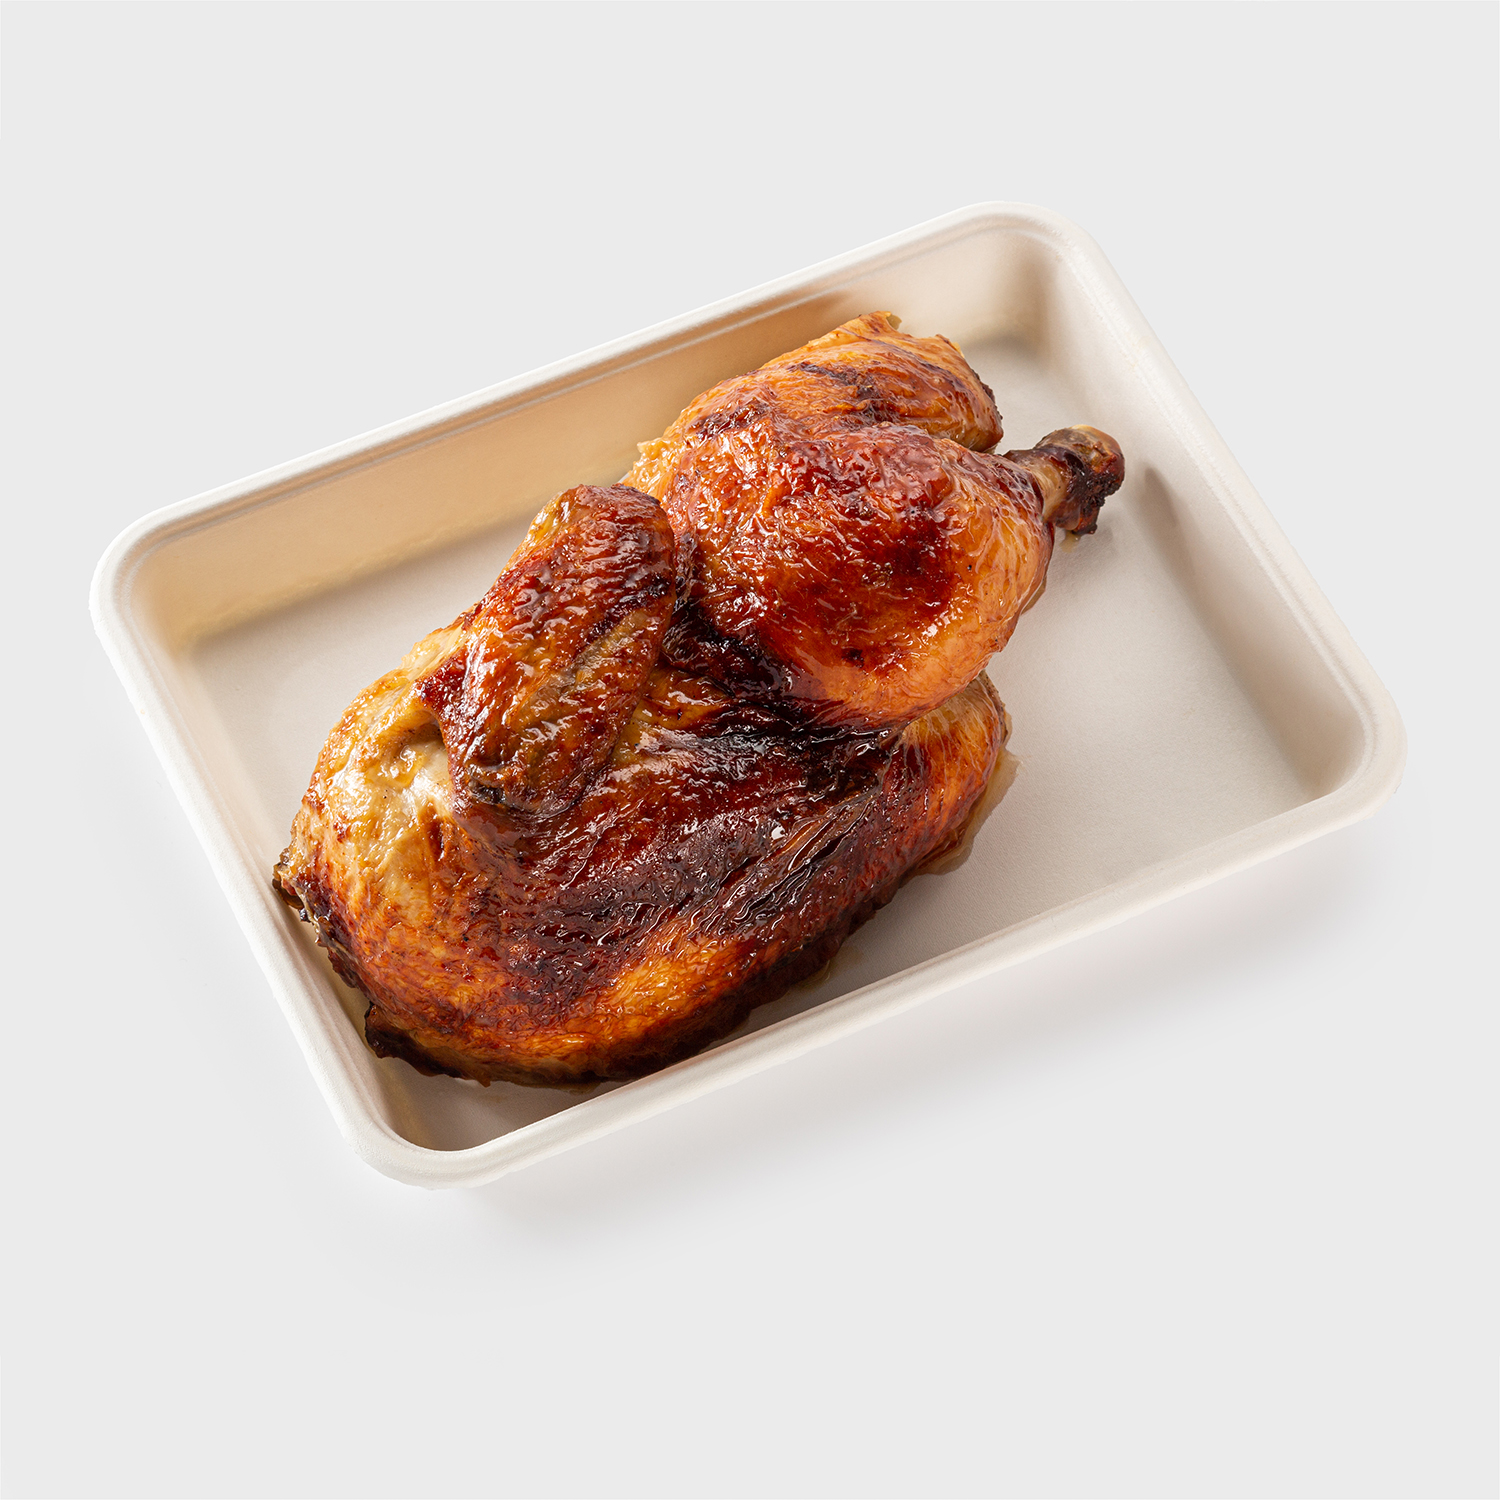

In [94]:
get_image_from_url(rrr.iloc[n]['url'])

In [58]:
rrr.iloc[n]['url']

'https://glovo.away.guru/test_photos/58c83189-bf88-415b-8582-3ff587bd08fe.jpeg'

In [88]:
rrr.iloc[n]['url']

'https://glovo.away.guru/test_photos/9e7c99aa-b620-466e-adbb-80ef1c34b027.jpeg'

In [ ]:
'https://glovo.away.guru/test_photos/58c83189-bf88-415b-8582-3ff587bd08fe.jpeg',
'https://glovo.away.guru/test_photos/9e7c99aa-b620-466e-adbb-80ef1c34b027.jpeg',
